# Logistic Regression with mini-batch

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use("seaborn")

## Set params
N, n_feature = 1000, 3
lr = 0.01
epochs = 5000
batch_size = 256
n_batch = N // batch_size

## logistic regression에서는 학습의 기준이 target_weight, target_bias가 아닌 decision boundary.
target_weight = np.random.uniform(-1, 1, (n_feature, 1))
target_bias = np.random.uniform(-1, 1, (1, 1))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

## generate Dataset
x_data = np.random.normal(0, 1, (N, n_feature))
y_data = x_data @ target_weight + target_bias
y_data = (y_data > 0).astype(int)

## training
J_track, acc_track = [], []
for epoch in range(epochs):
    for batch_idx in range(n_batch):
        ## get mini batch
        X = x_data[batch_idx * batch_size : (batch_idx + 1) * batch_size, ...]
        Y = y_data[batch_idx * batch_size : (batch_idx + 1) * batch_size, ...]

        ## forward propagation
        Z = X @ W + b
        pred = 1 / (1 + np.exp(-Z))
        J0 = -(Y * np.log(pred) + (1 - Y) * np.log(1 - pred))
        J = np.mean(J0)
        J_track.append(J)

        ## calculate accuracy
        pred_ = (pred > 0.5).astype(int)
        n_correct = np.sum((pred_ == Y).astype(int))
        acc = n_correct / batch_size
        acc_track.append(acc)

        ## jacobians
        dJ_dJ0 = 1 / batch_size * np.ones((1, batch_size))
        dJ0_dpred = np.diag(((pred - Y) / (pred * (1 - pred))).flatten())
        dpred_dZ = np.diag((pred * (1 - pred)).flatten())
        dZ_dW = X
        dZ_dB = np.ones((batch_size, 1))

        # print(dJ_dJ0.shape)
        # print(dJ0_dpred.shape)
        # print(dpred_dZ.shape)
        # print(dZ_dW.shape, dZ_dB.shape)

        ## back propagation
        dJ_dpred = dJ_dJ0 @ dJ0_dpred
        dJ_dZ = dJ_dpred @ dpred_dZ
        dJ_dW = dJ_dZ @ dZ_dW
        dJ_db = dJ_dZ @ dZ_dB

        ## parameter update
        W = W - lr * dJ_dW.T
        b = b - lr * dJ_db

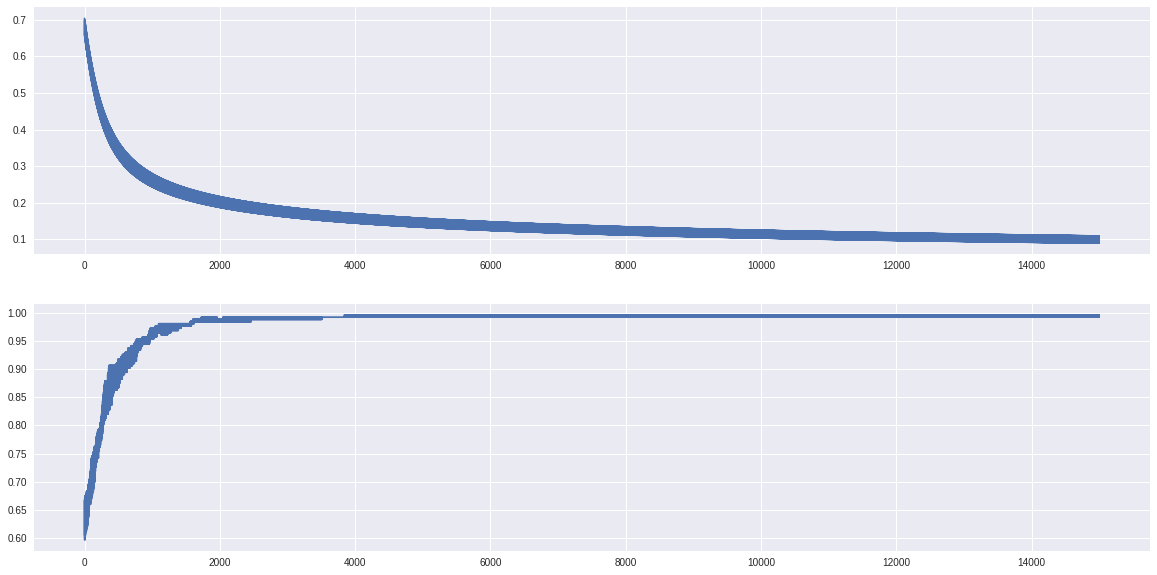

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)